# Wprowadzenie do obliczeń w Pythonie

## Ćwiczenia
Ćwiczenia należy wykonywać w środowisku Python 3. Instrukcję będą miały formę notatników Jupyter Notebook, ale same polecenia można wykonywać w dowolnym IDE (osoby znające Matlaba mogą skorzystać z edytora [Spyder](https://www.spyder-ide.org), który posiada układ podobny do produktu firmy Mathworks).
### Python vs Matlab
W kontekście obliczeń numerycznych oba środowiska są do siebie podobne. W 90% przypadków nazwy funkcji, kolejność argumentów i sposób rozwiązania danego problemu będą takie same w obu środowiskach. Istnieje jednak kilka różnic, o których należy pamiętać:
* Matlab jest narzędziem stworzonym specjalnie do obliczeń, Python to język programowania ogólnego przeznaczenia.
* W Pythonie do wykonywania obliczeń i wizualizacji wykorzystuje się biblioteki takie jak NumPy, SciPy, SymPy, Matplotlib, Seaborn itd. W Matlabie większość funkcjonalności jest dostępna "od ręki" (chociaż istnieją też płatne dodatki).
* W Matlabie tablice/macierze są indeksowane od **1** (tak jak np. w języku Pascal), w Pythonie pierwszy element kolekcji znajduje się na pozycji **0** (tak jak w większości języków programowania ogólnego przeznaczenia, np. C, C++, Java, Kotlin, Swift).
* Sposób mnożenia macierzy (temat zostanie poruszony na jednych z kolejnych zajęć).
Ciekawy zestaw przykładów pokazujący różnice pomiędzy Pythonem i Matlabem (a także Julią) znajdziecie Państwo na [tutaj](https://cheatsheets.quantecon.org).

# Obliczenia numeryczne w Pythonie

Podstawowym pakietem do obliczeń naukowych w Pythonie jest *numpy*. Zwyczajowo importuje się go w następujący sposób:

In [14]:
import numpy as np

**Uwaga.** Niektóre funkcje (np. *sqrt*) występują w więcej niż jednym pakiecie (np. *sqrt* znajduje się zarówno w *math*, jak i w *numpy*). W takich przypadkach zazwyczaj lepiej jest zastosować implementację z *numpy* (o ile jest dostępna).

In [7]:
import math

print(math.sqrt(2))
print((np.sqrt(2)))

1.4142135623730951
1.4142135623730951


## Typy proste

***Zadanie 1.***   
Oblicz wartości następujących formuł:
  
$k = 1240\sqrt{7}$  
$m = 2048$  
$l = 2j$  
$d = k+2m$  
$c = d+l$  
  
Po wykonaniu obliczeń sprawdź typy danych utworzonych zmiennych (funkcja *type*)

In [28]:
k = 1240 * math.sqrt(7)
m = 2048
l = 2j
#d = k + 2m
c = d + l


In [29]:
print(type(k))
print(type(m))
print(type(l))
print(type(d))
print(type(c))

<class 'float'>
<class 'int'>
<class 'complex'>
<class 'int'>
<class 'complex'>


## Formatowanie wyjścia

W pracy z liczbami warto wykorzystać formatowanie stringów.


In [35]:
a = 1
b = 2
'a = {a}, typ: {t}'.format(a = a, t = type(a))

"a = 1, typ: <class 'int'>"

W Pythonie 3.6+ dostępny jest również nowy format zwany *f-String*, który pozwala umieszczać wyrażenia do obliczenia bezpośrednio w łańcuchu.

In [36]:
f'a = {a}, typ: {type(a)}, 2 + 2 = {2+2}'

"a = 1, typ: <class 'int'>, 2 + 2 = 4"

Możliwe jest również sterowanie formatowaniem wartości [liczbowych](https://docs.python.org/3/tutorial/inputoutput.html):

In [37]:
# Dla typu float
print(f'a = {a}')
print(f'a = {a:.3f}')
print(f'a = {a:.50f}')

#Dla typu int
print()
print(f'b = {b}')
print(f'b = {b:10d}')
print(f'b = {b:20d}')

a = 1
a = 1.000
a = 1.00000000000000000000000000000000000000000000000000

b = 2
b =          2
b =                    2


## Typy tablicowe

W bibliotece standardowej Pythona brakuje typu tablicowego (jest jedynie lista), który przydaje się podczas pracy z danymi liczbowymi. Lukę tę wypełnia typ tablicowy z *numpy*. 

In [38]:
tab = np.array([1,2,3])
tab2 = np.array(([1.0,2],[3,4])) # argument w postaci krotki!
print(f'{tab}, typ: {type(tab)}')
print(f'{tab2}, typ: {type(tab2)}')

[1 2 3], typ: <class 'numpy.ndarray'>
[[1. 2.]
 [3. 4.]], typ: <class 'numpy.ndarray'>


Jak widać tablice w *numpy* są obiektami typu *ndarray*. Jest to homogeniczny typ tablicowy, czyli taki, który pozwala przechowywać jedynie dane tego samego typu (w każdej tablicy wszystkie elementy są jednego typu, tak jak np. w C). Dane heterogeniczne można przechowywać np. w strukturze *DataFrame* z biblioteki *Pandas*.
Obiekt typu *ndarray* posiada kilka interesujących atrybutów:
* *shape* — kształt tablicy, czyli krotka zawierająca liczbę elementów dla każdego wymiaru (osi) tablicy. Wymiary można również sprawdzić za pomocą *np.shape()*.
* *size* — sumaryczna liczba elementów.
* *ndim* — liczba wymiarów (osi).
* *nbytes* — liczba bajtów zajmowana przez obiekt.
* *dtype* — typ danych przechowywanych w tablicy. Można go jawnie określić podczas tworzenia tablicy (parametr dtype)
 

In [42]:
def printDetails(arr):
    print(f'Tablica {arr}')
    print(f'   shape = {arr.shape}')
    print(f'   size = {arr.size}')
    print(f'   ndim = {arr.ndim}')
    print(f'   nbytes = {arr.nbytes}')
    print(f'   dtype = {arr.dtype}')
    print()

***Uwaga!*** W *numpy* dostępny jest też typ *matrix*. Jest on obecnie uznany za ,,przestarzały'' (ang. *deprecated*) i nie należy z niego korzystać (nawet w zastosowaniach numerycznych, co sugerowałaby jego nazwa).

In [40]:
printDetails(tab) # Uwaga na shape!
printDetails(tab2)



Tablica [1 2 3]
   shape = (3,)
   size = 3
   ndim = 1
   nbytes = 24
   dtype = int64

Tablica [[1. 2.]
 [3. 4.]]
   shape = (2, 2)
   size = 4
   ndim = 2
   nbytes = 32
   dtype = float64



#### Zmiana kształtu
Do zmiany kształtu tablic służy funkcja *reshape()*. Nowe wymiary muszą odpowiadać liczbie elementów w tablicy!

In [41]:
tab3 = tab.reshape(1,3)
printDetails(tab3)

tab4 = tab.reshape(10,3)



Tablica [[1 2 3]]
   shape = (1, 3)
   size = 3
   ndim = 2
   nbytes = 24
   dtype = int64



ValueError: cannot reshape array of size 3 into shape (10,3)

#### Tworzenie tablic

Poza metodą *array*, tablice można utworzyć również z pomocą wielu innych [funkcji](https://numpy.org/doc/stable/reference/routines.array-creation.html#routines-array-creation) m.in.:
* *np.zeros()* — tworzy tablicę o zadanym rozmiarze wypełnioną zerami.
* *np.ones()* — tworzy tablicę o zadanym rozmiarze wypełnioną jedynkami.
* *np.identity()* — tworzy macierz identycznościową o zadanym rozmiarze.
* *np.eye()* — tworzy tablicę o zadanym rozmiarze z jedynkami na przekątnej.
* **np.linspace()** — tworzy tablicę z równomiernie rozmieszczonymi wartościami znajdującymi się pomiędzy określoną początkową i końcową wartością z użyciem określonej liczby elementów.
* *np.fromfile(), np.fromstring(), np.loadtxt()* — tworzy tablice na podstawie danych z plików lub stringów.

In [43]:
zeros = np.zeros((2,2))
print(zeros)

[[0. 0.]
 [0. 0.]]


In [44]:
ones = np.ones([5,10])
print(ones)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [45]:
np.identity(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [46]:
np.eye(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [47]:
np.linspace(1,10,5) # Tablica 5 wartości rozmieszczonych równomiernie w przedziale [1,10]

array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])

## Operacje na macierzach

### Indeksowanie

In [48]:
A = np.array(([1,2,3],[4,5,6],[7,8,9]))
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [50]:
A[1,1]

5

In [51]:
A[0,0]

1

In [52]:
A[0:2,0:1]

array([[1],
       [4]])

In [53]:
A[-1,-1]

9

In [54]:
A[A>5]

array([6, 7, 8, 9])

In [55]:
A[A%2==0]

array([2, 4, 6, 8])

In [56]:
B = A
B[B>5] = 37 # Indeksowanie wraz z przypisaniem nowej wartości
B

array([[ 1,  2,  3],
       [ 4,  5, 37],
       [37, 37, 37]])

### Operacje arytmetyczne

In [65]:
A = np.array(([1,2,3],[4,5,6],[7,8,9],[10,11,12]))
B = np.array(([-1,-2,-3],[-4,-5,-6],[-7,-8,-9],[-10,-11,-12]))
C = np.array(([20,21,22,23],[24,25,26,27],[28,29,30,31]))

In [66]:
print(A)
print(B)
print(C)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ -1  -2  -3]
 [ -4  -5  -6]
 [ -7  -8  -9]
 [-10 -11 -12]]
[[20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


In [67]:
A+B

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [60]:
A-B

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18],
       [20, 22, 24]])

In [61]:
B-A

array([[ -2,  -4,  -6],
       [ -8, -10, -12],
       [-14, -16, -18],
       [-20, -22, -24]])

In [62]:
A*B # Mnożenie odpowiadających sobie elementów!!

array([[  -1,   -4,   -9],
       [ -16,  -25,  -36],
       [ -49,  -64,  -81],
       [-100, -121, -144]])

In [63]:
A/B # Dzielenie odpowiadających sobie elementów!!

array([[-1., -1., -1.],
       [-1., -1., -1.],
       [-1., -1., -1.],
       [-1., -1., -1.]])

In [64]:
A*C # Niepoprawne, wymiary nie są zgodne

ValueError: operands could not be broadcast together with shapes (4,3) (3,4) 

In [68]:
np.dot(A,C) # Mnożenie macierzowe macierzy

array([[152, 158, 164, 170],
       [368, 383, 398, 413],
       [584, 608, 632, 656],
       [800, 833, 866, 899]])

In [69]:
A @ C # Inny zapis, Python 3.5+

array([[152, 158, 164, 170],
       [368, 383, 398, 413],
       [584, 608, 632, 656],
       [800, 833, 866, 899]])

In [70]:
A.T # Macierz transponowana

array([[ 1,  4,  7, 10],
       [ 2,  5,  8, 11],
       [ 3,  6,  9, 12]])

In [71]:
np.transpose(A)

array([[ 1,  4,  7, 10],
       [ 2,  5,  8, 11],
       [ 3,  6,  9, 12]])

***Zadanie 2.***  
Zadeklaruj macierz 
$\mathbf{M} =\left[ \begin{matrix}
\sqrt{2} & 1 & -\sqrt{2}\\
0 & 1 & 1\\
-\sqrt{2} & \sqrt{2} & 1
\end{matrix}\right]
$    
Wyznacz numerycznie jej macierz odwrotną (*np.linalg.inv*) i transponowaną. Oblicz wyznacznik tej macierzy (*np.linalg.det()*). Wypisz otrzymane wyniki. 

In [90]:
macierz = np.array(([np.sqrt(2),1,-np.sqrt(2)],[0,1,1],[-np.sqrt(2),np.sqrt(2),1]))
print(macierz)
print(np.linalg.inv(macierz))
print(np.transpose(macierz))
np.linalg.det(macierz)

[[ 1.41421356  1.         -1.41421356]
 [ 0.          1.          1.        ]
 [-1.41421356  1.41421356  1.        ]]
[[ 0.10355339  0.75       -0.60355339]
 [ 0.35355339  0.14644661  0.35355339]
 [-0.35355339  0.85355339 -0.35355339]]
[[ 1.41421356  0.         -1.41421356]
 [ 1.          1.          1.41421356]
 [-1.41421356  1.          1.        ]]


-4.0

# Wizualizacja danych

Do wizualizacji wyników, tworzenia wykresów itd. wykorzystamy bibliotekę *matplotlib*, a konkretniej jej stanowe i obiektowe API zwane *pyplot*. Zwyczajowo importu dokonuje się w następujący sposób:

In [93]:
import matplotlib.pyplot as plt

Tworzenie wykresu rozpoczyna się od utworzenia "okna":

In [94]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

Następnie można skorzystać z jednej z dostępnych metod wizualizacji. Do stworzenia wykresu potrzebne będą też dane. Funkcja *plt.plot()* pozwala wyświetlić dane przekazane w postaci tablic (np. tablic punktów X i Y).

In [95]:
X = np.linspace(0,2*np.pi, 1000)
Y = np.sin(X)

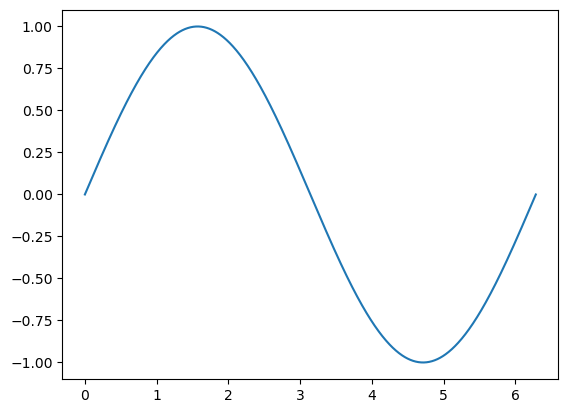

In [96]:
plt.plot(X,Y)

Wykresy można również personalizować.

Text(0, 0.5, 'sin(x)')

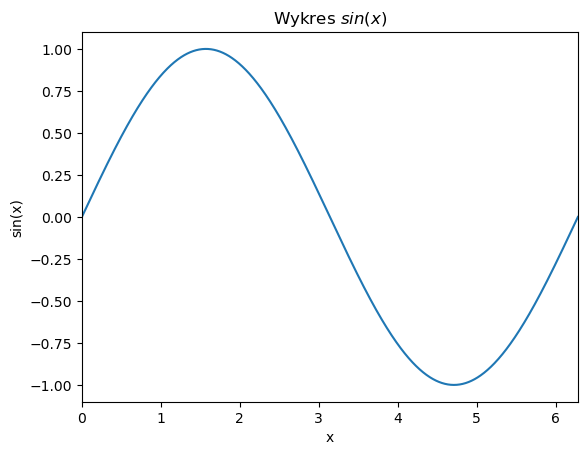

In [97]:
plt.plot(X,Y)
plt.title('Wykres $sin(x)$')
plt.xlim([0,2*np.pi])
plt.xlabel('x')
plt.ylabel('sin(x)')


Na jednym wykresie można pokazać kilka ,,obiektów''. Możliwe jest również dodanie siatki i legendy (treści ,,matematyczne'' wstawiamy między dolarami).

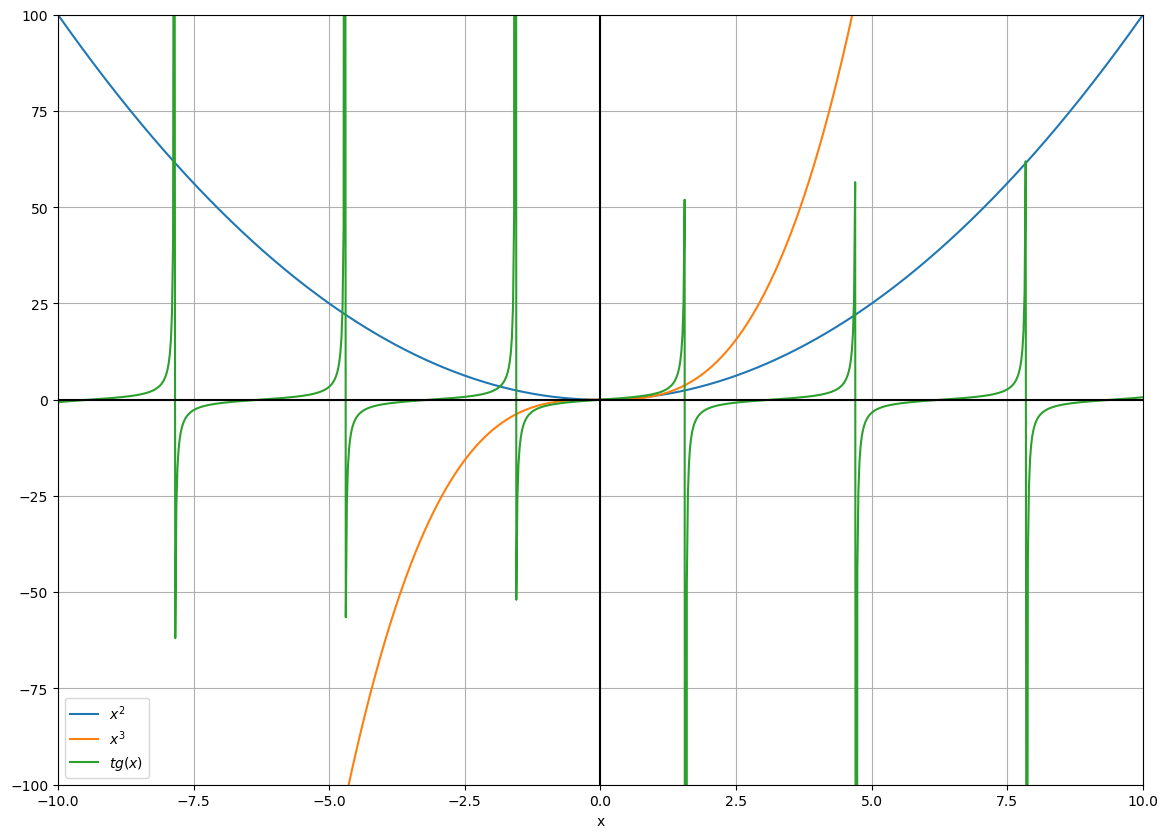

In [98]:
plt.figure(figsize=(14,10)) # Stworzenie ,,większego'' okna
X = np.linspace(-10,10, 1000)

plt.plot(X,X**2, label = '$x^2$') # W argumencie label umieszcza się nazwy krzywych do legendy
plt.plot(X,X**3, label = '$x^3$')
plt.plot(X,np.tan(X), label = '$tg(x)$')
plt.xlim([-10,10])
plt.ylim([-100,100])
plt.xlabel('x')
plt.grid() # Wyświetlanie siatki
plt.legend() # Dodanie legendy
plt.axhline(y=0, color='k') # Dodanie osi x = 0
plt.axvline(x=0, color='k') # Dodanie osi y = 0

Dane na wykresie niekoniecznie muszą mieć formę krzywych

Text(0, 0.5, 'sin(x)')

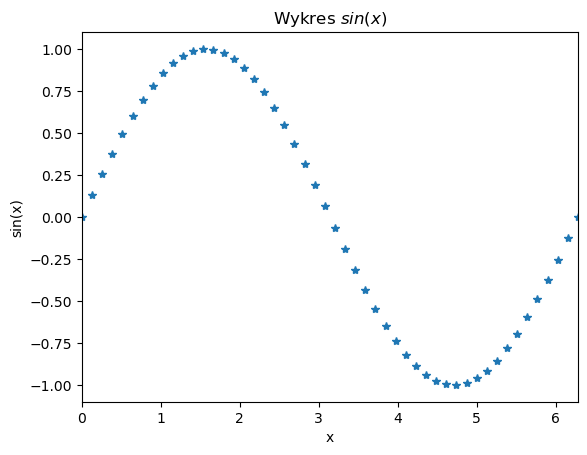

In [99]:
plt.figure()
X = np.linspace(0,2*np.pi, 50)
plt.plot(X,np.sin(X), '*')
plt.title('Wykres $sin(x)$')
plt.xlim([0,2*np.pi])
plt.xlabel('x')
plt.ylabel('sin(x)')


Text(0, 0.5, 'sin(x)')

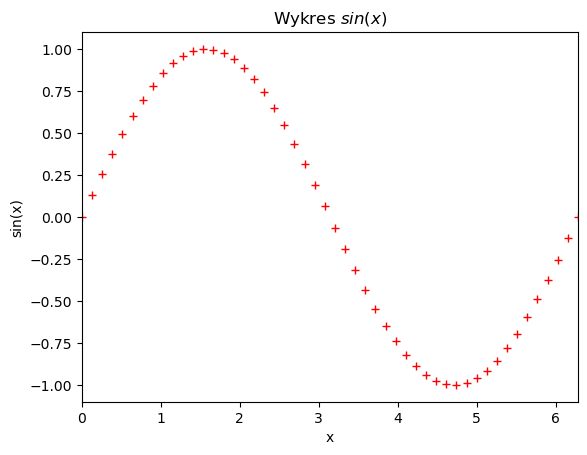

In [79]:
plt.figure()
X = np.linspace(0,2*np.pi, 50)
plt.plot(X,np.sin(X), 'r+')
plt.title('Wykres $sin(x)$')
plt.xlim([0,2*np.pi])
plt.xlabel('x')
plt.ylabel('sin(x)')

***Zadanie 3.***

Zdefinuj funkcję 
$f(x) = x^3 - 5x + 7$
i stwórz jej wykresy w przedziałach:
* $x\in<-1,1>$ 
* $x\in<-10,20>$

Spersonalizuj wykresy: dodaj tytuły, opisy osi etc.

<Figure size 640x480 with 0 Axes>

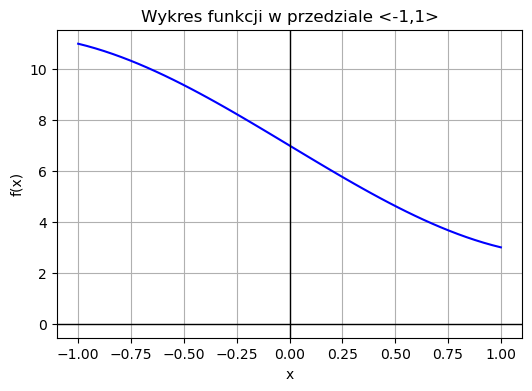

In [170]:
import matplotlib.pyplot as plt
fig = plt.figure()

def f(x):
    return x**3 - 5*x + 7

x1 = np.linspace(-1, 1)  
y1 = f(x1)

plt.figure(figsize=(6, 4))
plt.plot(x1, y1, label='$f(x) = x^3 - 5x + 7$', color='b')

plt.title('Wykres funkcji w przedziale <-1,1>')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)


<Figure size 640x480 with 0 Axes>

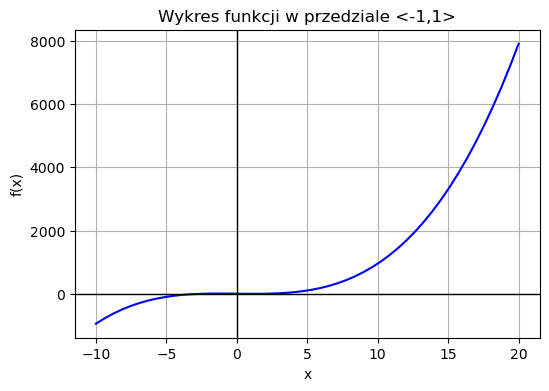

In [168]:
import matplotlib.pyplot as plt
fig = plt.figure()

def f(x):
    return x**3 - 5*x + 7

x1 = np.linspace(-10, 20)  
y1 = f(x1)

plt.figure(figsize=(6, 4))
plt.plot(x1, y1, label='$f(x) = x^3 - 5x + 7$', color='b')

plt.title('Wykres funkcji w przedziale <-1,1>')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)


# Wizualizacja macierzy

W obliczeniach numerycznych często pojawia się potrzeba porównania zawartości dwóch macierzy lub wektorów. Jednym z prostych rozwiązań jest przedstawienie obu macierzy w postaci „graficznej”, w której kolory reprezentują wartości znajdujące się w macierzy.

Text(0.5, 1.0, 'Macierz B')

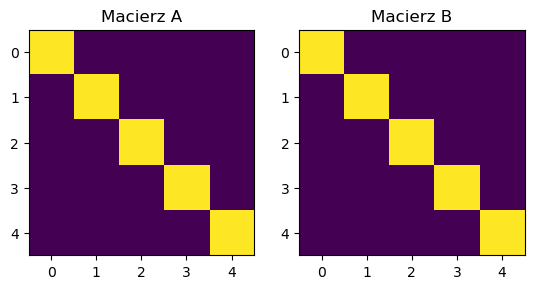

In [80]:
A = np.identity(5)
B = np.diag([1,1,1,1,1])

plt.subplot(1,2,1)
plt.imshow(A)
plt.title('Macierz A')

plt.subplot(1,2,2)
plt.imshow(B)
plt.title('Macierz B')

Uwaga: kolorystykę można dostoswać za pomocą argumentu `cmap` (np. `cmap='gray'`)

***Zadanie 4.***

Zastanów się nad innymi sposobami porównywania macierzy. Jak można to zrobić, jak łatwo ocenić czy dwie macierze zawierają te same/podobne wartości?

In [ ]:
#numpy.allclose
#are equal

***Zadanie 5.***

Stwórz kwadratową macierz wartości losowych o wymarach 10x10. Następnie przeprowadź jej rozklad QR za pomocą funkcji [`scipy.linalg.qr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.qr.html) (sprawdź, w dokumentacji jak działa ta funkcja oraz jakie wartości zwraca). W wyniku rozkładu otrzymasz dwie macierze `Q` i `R` (szczegóły na jednych z kolejnych zajęć). Następnie przypisz macierz Q do zmiennej i wyznacz jej **transpozycję** ($Q^T$) oraz **odwrotność** ($Q^{-1}$). Porównaj ze sobą te dwie macierz. Jaki wynik otrzymałeś i dlaczego? Powtórz obliczenia kilkukrotnie dla macierzy o różnych rozmiarach.

Text(0.5, 1.0, 'Macierz Q odwrotna')

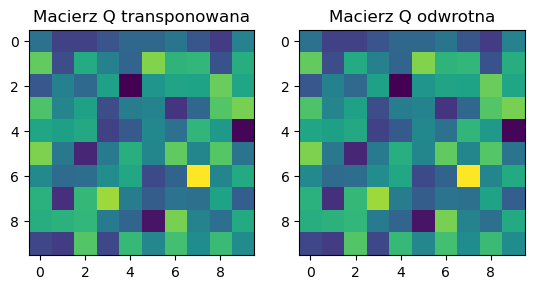

In [174]:
macierz1 = np.random.rand(10, 10)
Q, R = qr(macierz1)
Q_T = Q.T
Q_inv = np.linalg.inv(Q)

plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(Q_T)
plt.title('Macierz Q transponowana')

plt.subplot(1, 2, 2)
plt.imshow(Q_inv)
plt.title('Macierz Q odwrotna')


Text(0.5, 1.0, 'Macierz Q odwrotna')

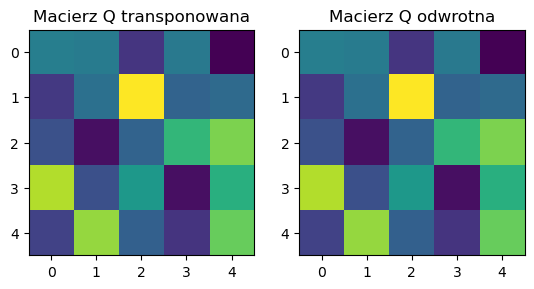

In [175]:
macierz1 = np.random.rand(5, 6)
Q, R = qr(macierz1)
Q_T = Q.T
Q_inv = np.linalg.inv(Q)

plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(Q_T)
plt.title('Macierz Q transponowana')

plt.subplot(1, 2, 2)
plt.imshow(Q_inv)
plt.title('Macierz Q odwrotna')

Text(0.5, 1.0, 'Macierz Q odwrotna')

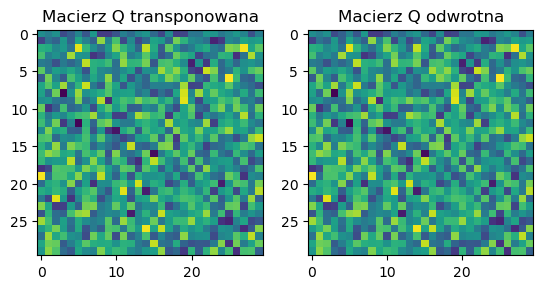

In [176]:
macierz1 = np.random.rand(30, 40)
Q, R = qr(macierz1)
Q_T = Q.T
Q_inv = np.linalg.inv(Q)

plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(Q_T)
plt.title('Macierz Q transponowana')

plt.subplot(1, 2, 2)
plt.imshow(Q_inv)
plt.title('Macierz Q odwrotna')